<a href="https://colab.research.google.com/github/NoahSprunk/Advanced-Machine-Learning/blob/main/Sprunk%2C_Noah_NeuralNetworkAssignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)


17464789/17464789 [==============================] - 1s 0us/step


In [2]:
train_labels[19]

1

In [3]:
max([max(sequence) for sequence in train_data])


9999

In [ ]:
# word_index is a dictionary mapping words to an integer index
word_index = imdb.get_word_index()
# We reverse it, mapping integer indices to words
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
# We decode the review; note that our indices were offset by 3
# because 0, 1 and 2 are reserved indices for "padding", "start of sequence", and "unknown".
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])


1641221/1641221 [==============================] - 0s 0us/step


In [ ]:
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [4]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    # Create an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  # set specific indices of results[i] to 1s
    return results

# Our vectorized training data
x_train = vectorize_sequences(train_data)
# Our vectorized test data
x_test = vectorize_sequences(test_data)

In [5]:
x_train[19]

array([0., 1., 1., ..., 0., 0., 0.])

In [6]:
# Vectorizing the labels

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [7]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [8]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [9]:
from keras import optimizers
from keras import losses
from keras import metrics

from tensorflow import keras
from keras import optimizers
from tensorflow.keras import optimizers
from tensorflow.keras import optimizers

model.compile(optimizer=optimizers.RMSprop(learning_rate=0.001),
              loss = losses.binary_crossentropy,
              metrics = [metrics.binary_accuracy])

In [10]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [11]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 44ms/step - loss: 0.4972 - binary_accuracy: 0.7799 - val_loss: 0.3630 - val_binary_accuracy: 0.8745
Epoch 2/20
30/30 [==============================] - 1s 20ms/step - loss: 0.2922 - binary_accuracy: 0.8991 - val_loss: 0.2976 - val_binary_accuracy: 0.8853
Epoch 3/20
30/30 [==============================] - 1s 20ms/step - loss: 0.2210 - binary_accuracy: 0.9238 - val_loss: 0.2931 - val_binary_accuracy: 0.8801
Epoch 4/20
30/30 [==============================] - 1s 19ms/step - loss: 0.1808 - binary_accuracy: 0.9388 - val_loss: 0.2954 - val_binary_accuracy: 0.8812
Epoch 5/20
30/30 [==============================] - 1s 24ms/step - loss: 0.1492 - binary_accuracy: 0.9508 - val_loss: 0.3841 - val_binary_accuracy: 0.8518
Epoch 6/20
30/30 [==============================] - 1s 22ms/step - loss: 0.1248 - binary_accuracy: 0.9605 - val_loss: 0.3029 - val_binary_accuracy: 0.8829
Epoch 7/20
30/30 [==============================] - 1s 23ms/step - los

In [12]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'binary_accuracy', 'val_loss', 'val_binary_accuracy'])

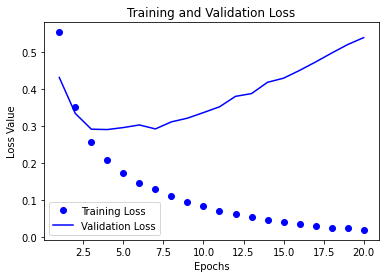

In [ ]:
import matplotlib.pyplot as plt

Loss_Values = history_dict['loss']
Val_Loss_Values = history_dict['val_loss']

epochs = range(1, len(Loss_Values) + 1)

plt.plot(epochs, Loss_Values, 'bo', label="Training Loss")
plt.plot(epochs, Val_Loss_Values, 'b', label="Validation Loss")

plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss Value')
plt.legend()

plt.show()

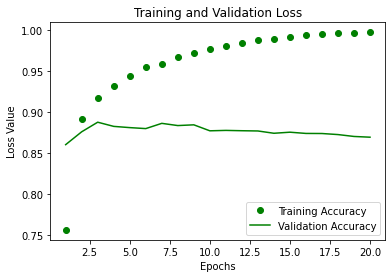

In [ ]:
Acc_Values = history_dict['binary_accuracy']
Val_Acc_Values = history_dict['val_binary_accuracy']

epochs = range(1, len(Loss_Values) + 1)

plt.plot(epochs, Acc_Values, 'go', label = "Training Accuracy")
plt.plot(epochs, Val_Acc_Values, 'g', label = "Validation Accuracy")

plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss Value')
plt.legend()

plt.show()

In [32]:
Val_Acc_Values

[0.8751000165939331,
 0.8429999947547913,
 0.8270000219345093,
 0.8845000267028809,
 0.8658999800682068,
 0.8830999732017517,
 0.8637999892234802,
 0.8781999945640564,
 0.8776999711990356,
 0.8766999840736389,
 0.8787999749183655,
 0.8759999871253967,
 0.8756999969482422,
 0.8747000098228455,
 0.8744000196456909,
 0.8751000165939331,
 0.8737000226974487,
 0.8741999864578247,
 0.8093000054359436,
 0.8719000220298767]

We can see that the validation accuracy (Val_Acc_Values = 0.8894 at 3 epochs) of this model increaces up until the 3rd epoch then dips but then comes back up. Going to make a model that is 3 epochs to see the accuracy

In [ ]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=3, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/3
49/49 [==============================] - 3s 33ms/step - loss: 0.4728 - accuracy: 0.8082
Epoch 2/3
49/49 [==============================] - 2s 35ms/step - loss: 0.2816 - accuracy: 0.9037
Epoch 3/3
782/782 [==============================] - 2s 3ms/step - loss: 0.2817 - accuracy: 0.8872


I will now use the 3 hidden layer method to create a model.

Epoch 1/20
30/30 [==============================] - 3s 84ms/step - loss: 0.5454 - binary_accuracy: 0.7703 - val_loss: 0.4317 - val_binary_accuracy: 0.8413
Epoch 2/20
30/30 [==============================] - 3s 89ms/step - loss: 0.3252 - binary_accuracy: 0.8933 - val_loss: 0.3066 - val_binary_accuracy: 0.8849
Epoch 3/20
30/30 [==============================] - 1s 37ms/step - loss: 0.2304 - binary_accuracy: 0.9215 - val_loss: 0.3069 - val_binary_accuracy: 0.8750
Epoch 4/20
30/30 [==============================] - 2s 66ms/step - loss: 0.1813 - binary_accuracy: 0.9405 - val_loss: 0.3111 - val_binary_accuracy: 0.8761
Epoch 5/20
30/30 [==============================] - 2s 62ms/step - loss: 0.1448 - binary_accuracy: 0.9533 - val_loss: 0.2885 - val_binary_accuracy: 0.8866
Epoch 6/20
30/30 [==============================] - 2s 55ms/step - loss: 0.1268 - binary_accuracy: 0.9581 - val_loss: 0.3064 - val_binary_accuracy: 0.8838
Epoch 7/20
30/30 [==============================] - 1s 45ms/step - los

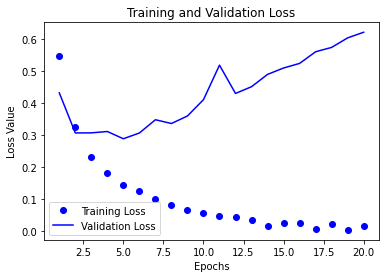

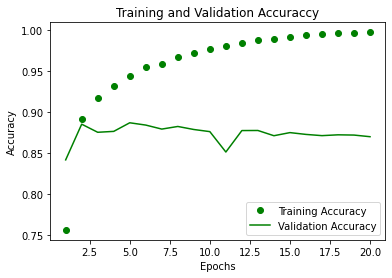

Epoch 1/3
49/49 [==============================] - 2s 34ms/step - loss: 0.4680 - accuracy: 0.8072
Epoch 2/3
49/49 [==============================] - 2s 33ms/step - loss: 0.2703 - accuracy: 0.9032
Epoch 3/3
782/782 [==============================] - 3s 3ms/step - loss: 0.3040 - accuracy: 0.8778


[0.30400627851486206, 0.877839982509613]

In [ ]:
from keras import models
from tensorflow.keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

from keras import optimizers
from keras import losses
from keras import metrics

from tensorflow import keras
from keras import optimizers
from tensorflow.keras import optimizers
from tensorflow.keras import optimizers

model.compile(optimizer=optimizers.RMSprop(learning_rate=0.001),
              loss = losses.binary_crossentropy,
              metrics = [metrics.binary_accuracy])

x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

history_dict = history.history
history_dict.keys()

# Plotting the training and validation loss

import matplotlib.pyplot as plt

Loss_Values = history_dict['loss']
Val_Loss_Values = history_dict['val_loss']

epochs = range(1, len(Loss_Values) + 1)

plt.plot(epochs, Loss_Values, 'bo', label="Training Loss")
plt.plot(epochs, Val_Loss_Values, 'b', label="Validation Loss")

plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss Value')
plt.legend()

plt.show()


# Plotting the training and validation accuracy
# Training and Validation Accuracy

Acc_values = history_dict['binary_accuracy']
Val_Acc_Values = history_dict['val_binary_accuracy']

epochs = range(1, len(Loss_Values) + 1)

plt.plot(epochs, Acc_Values, 'go', label="Training Accuracy")
plt.plot(epochs, Val_Acc_Values, 'g', label="Validation Accuracy")

plt.title('Training and Validation Accuraccy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=3, batch_size=512)
results = model.evaluate(x_test, y_test)

results

WRITE RESULTS FOR THE 3 HIDDEN LAYER TEST

HIDDEN 1 LAYER TEST

Epoch 1/20
30/30 [==============================] - 3s 86ms/step - loss: 0.5030 - binary_accuracy: 0.7907 - val_loss: 0.3939 - val_binary_accuracy: 0.8599
Epoch 2/20
30/30 [==============================] - 2s 53ms/step - loss: 0.3247 - binary_accuracy: 0.8981 - val_loss: 0.3211 - val_binary_accuracy: 0.8817
Epoch 3/20
30/30 [==============================] - 2s 69ms/step - loss: 0.2568 - binary_accuracy: 0.9178 - val_loss: 0.2967 - val_binary_accuracy: 0.8833
Epoch 4/20
30/30 [==============================] - 1s 50ms/step - loss: 0.2158 - binary_accuracy: 0.9304 - val_loss: 0.3310 - val_binary_accuracy: 0.8610
Epoch 5/20
30/30 [==============================] - 1s 40ms/step - loss: 0.1888 - binary_accuracy: 0.9408 - val_loss: 0.2740 - val_binary_accuracy: 0.8890
Epoch 6/20
30/30 [==============================] - 2s 54ms/step - loss: 0.1660 - binary_accuracy: 0.9481 - val_loss: 0.2822 - val_binary_accuracy: 0.8857
Epoch 7/20
30/30 [==============================] - 1s 46ms/step - los

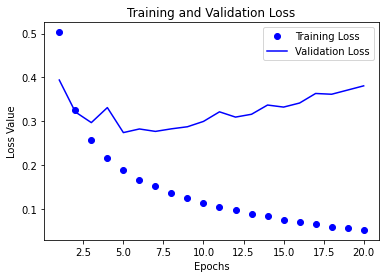

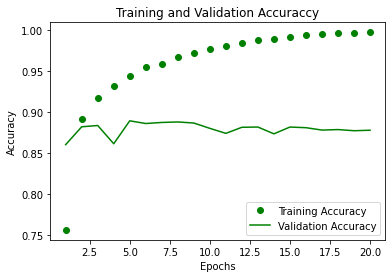

Epoch 1/3
49/49 [==============================] - 3s 32ms/step - loss: 0.4869 - accuracy: 0.7984
Epoch 2/3
49/49 [==============================] - 2s 34ms/step - loss: 0.2670 - accuracy: 0.9042
Epoch 3/3
782/782 [==============================] - 2s 3ms/step - loss: 0.3143 - accuracy: 0.8744


[0.31428030133247375, 0.8743600249290466]

In [ ]:
from keras import models
from tensorflow.keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

from keras import optimizers
from keras import losses
from keras import metrics

from tensorflow import keras
from keras import optimizers
from tensorflow.keras import optimizers
from tensorflow.keras import optimizers

model.compile(optimizer=optimizers.RMSprop(learning_rate=0.001),
              loss = losses.binary_crossentropy,
              metrics = [metrics.binary_accuracy])

x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

history_dict = history.history
history_dict.keys()

# Plotting the training and validation loss

import matplotlib.pyplot as plt

Loss_Values = history_dict['loss']
Val_Loss_Values = history_dict['val_loss']

epochs = range(1, len(Loss_Values) + 1)

plt.plot(epochs, Loss_Values, 'bo', label="Training Loss")
plt.plot(epochs, Val_Loss_Values, 'b', label="Validation Loss")

plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss Value')
plt.legend()

plt.show()


# Plotting the training and validation accuracy
# Training and Validation Accuracy

Acc_values = history_dict['binary_accuracy']
Val_Acc_Values = history_dict['val_binary_accuracy']

epochs = range(1, len(Loss_Values) + 1)

plt.plot(epochs, Acc_Values, 'go', label="Training Accuracy")
plt.plot(epochs, Val_Acc_Values, 'g', label="Validation Accuracy")

plt.title('Training and Validation Accuraccy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=3, batch_size=512)
results = model.evaluate(x_test, y_test)

results

I will now test 32 hidden neurons in 2 hidden layers

Epoch 1/20
30/30 [==============================] - 2s 42ms/step - loss: 0.5215 - binary_accuracy: 0.7691 - val_loss: 0.3706 - val_binary_accuracy: 0.8698
Epoch 2/20
30/30 [==============================] - 1s 23ms/step - loss: 0.3126 - binary_accuracy: 0.8863 - val_loss: 0.3134 - val_binary_accuracy: 0.8752
Epoch 3/20
30/30 [==============================] - 1s 22ms/step - loss: 0.2336 - binary_accuracy: 0.9158 - val_loss: 0.2773 - val_binary_accuracy: 0.8913
Epoch 4/20
30/30 [==============================] - 1s 23ms/step - loss: 0.1860 - binary_accuracy: 0.9342 - val_loss: 0.3018 - val_binary_accuracy: 0.8782
Epoch 5/20
30/30 [==============================] - 1s 22ms/step - loss: 0.1564 - binary_accuracy: 0.9455 - val_loss: 0.2826 - val_binary_accuracy: 0.8881
Epoch 6/20
30/30 [==============================] - 1s 26ms/step - loss: 0.1353 - binary_accuracy: 0.9521 - val_loss: 0.2974 - val_binary_accuracy: 0.8875
Epoch 7/20
30/30 [==============================] - 1s 27ms/step - los

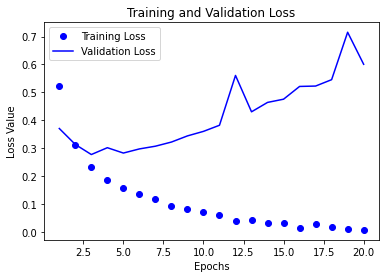

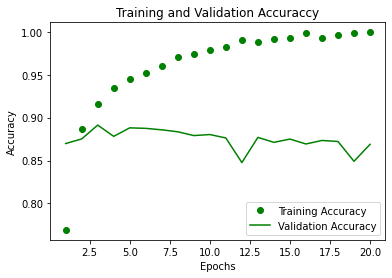

Epoch 1/3
49/49 [==============================] - 1s 17ms/step - loss: 0.4414 - accuracy: 0.8085
Epoch 2/3
49/49 [==============================] - 1s 17ms/step - loss: 0.2631 - accuracy: 0.9003
Epoch 3/3
782/782 [==============================] - 1s 2ms/step - loss: 0.2831 - accuracy: 0.8863


[0.28310149908065796, 0.8863199949264526]

In [19]:
from keras import models
from tensorflow.keras import layers

model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

from keras import optimizers
from keras import losses
from keras import metrics

from tensorflow import keras
from keras import optimizers
from tensorflow.keras import optimizers
from tensorflow.keras import optimizers

model.compile(optimizer=optimizers.RMSprop(learning_rate=0.001),
              loss = losses.binary_crossentropy,
              metrics = [metrics.binary_accuracy])

x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

history_dict = history.history
history_dict.keys()

# Plotting the training and validation loss

import matplotlib.pyplot as plt

Loss_Values = history_dict['loss']
Val_Loss_Values = history_dict['val_loss']

epochs = range(1, len(Loss_Values) + 1)

plt.plot(epochs, Loss_Values, 'bo', label="Training Loss")
plt.plot(epochs, Val_Loss_Values, 'b', label="Validation Loss")

plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss Value')
plt.legend()

plt.show()


# Plotting the training and validation accuracy
# Training and Validation Accuracy

Acc_Values = history_dict['binary_accuracy']
Val_Acc_Values = history_dict['val_binary_accuracy']

epochs = range(1, len(Loss_Values) + 1)

plt.plot(epochs, Acc_Values, 'go', label="Training Accuracy")
plt.plot(epochs, Val_Acc_Values, 'g', label="Validation Accuracy")

plt.title('Training and Validation Accuraccy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=3, batch_size=512)
results = model.evaluate(x_test, y_test)

results

I will now test the model with 64 neurons with 2 hidden layers.

Epoch 1/20
30/30 [==============================] - 2s 58ms/step - loss: 0.5070 - binary_accuracy: 0.7678 - val_loss: 0.3794 - val_binary_accuracy: 0.8477
Epoch 2/20
30/30 [==============================] - 1s 32ms/step - loss: 0.2914 - binary_accuracy: 0.8917 - val_loss: 0.3122 - val_binary_accuracy: 0.8692
Epoch 3/20
30/30 [==============================] - 1s 32ms/step - loss: 0.2265 - binary_accuracy: 0.9139 - val_loss: 0.2759 - val_binary_accuracy: 0.8893
Epoch 4/20
30/30 [==============================] - 1s 37ms/step - loss: 0.1757 - binary_accuracy: 0.9369 - val_loss: 0.2880 - val_binary_accuracy: 0.8828
Epoch 5/20
30/30 [==============================] - 1s 41ms/step - loss: 0.1506 - binary_accuracy: 0.9456 - val_loss: 0.2890 - val_binary_accuracy: 0.8840
Epoch 6/20
30/30 [==============================] - 1s 35ms/step - loss: 0.1210 - binary_accuracy: 0.9586 - val_loss: 0.3046 - val_binary_accuracy: 0.8835
Epoch 7/20
30/30 [==============================] - 1s 31ms/step - los

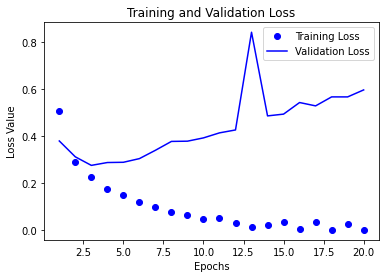

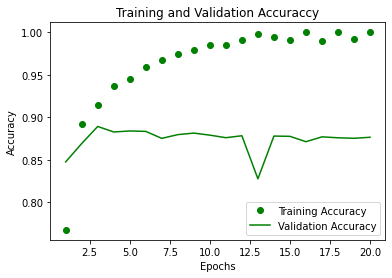

Epoch 1/3
49/49 [==============================] - 2s 23ms/step - loss: 0.4374 - accuracy: 0.8104
Epoch 2/3
49/49 [==============================] - 1s 24ms/step - loss: 0.2573 - accuracy: 0.8988
Epoch 3/3
782/782 [==============================] - 2s 2ms/step - loss: 0.2829 - accuracy: 0.8863


[0.28285109996795654, 0.8862800002098083]

In [20]:
from keras import models
from tensorflow.keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

from keras import optimizers
from keras import losses
from keras import metrics

from tensorflow import keras
from keras import optimizers
from tensorflow.keras import optimizers
from tensorflow.keras import optimizers

model.compile(optimizer=optimizers.RMSprop(learning_rate=0.001),
              loss = losses.binary_crossentropy,
              metrics = [metrics.binary_accuracy])

x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

history_dict = history.history
history_dict.keys()

# Plotting the training and validation loss

import matplotlib.pyplot as plt

Loss_Values = history_dict['loss']
Val_Loss_Values = history_dict['val_loss']

epochs = range(1, len(Loss_Values) + 1)

plt.plot(epochs, Loss_Values, 'bo', label="Training Loss")
plt.plot(epochs, Val_Loss_Values, 'b', label="Validation Loss")

plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss Value')
plt.legend()

plt.show()


# Plotting the training and validation accuracy
# Training and Validation Accuracy

Acc_Values = history_dict['binary_accuracy']
Val_Acc_Values = history_dict['val_binary_accuracy']

epochs = range(1, len(Loss_Values) + 1)

plt.plot(epochs, Acc_Values, 'go', label="Training Accuracy")
plt.plot(epochs, Val_Acc_Values, 'g', label="Validation Accuracy")

plt.title('Training and Validation Accuraccy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=3, batch_size=512)
results = model.evaluate(x_test, y_test)

results

I will now test a model with 128 hidden neurons and 2 hidden layers.

Epoch 1/20
30/30 [==============================] - 3s 71ms/step - loss: 0.5110 - binary_accuracy: 0.7586 - val_loss: 0.3523 - val_binary_accuracy: 0.8623
Epoch 2/20
30/30 [==============================] - 1s 46ms/step - loss: 0.3040 - binary_accuracy: 0.8789 - val_loss: 0.2881 - val_binary_accuracy: 0.8845
Epoch 3/20
30/30 [==============================] - 1s 46ms/step - loss: 0.2224 - binary_accuracy: 0.9162 - val_loss: 0.2985 - val_binary_accuracy: 0.8782
Epoch 4/20
30/30 [==============================] - 1s 47ms/step - loss: 0.1952 - binary_accuracy: 0.9234 - val_loss: 0.2845 - val_binary_accuracy: 0.8818
Epoch 5/20
30/30 [==============================] - 1s 46ms/step - loss: 0.1481 - binary_accuracy: 0.9458 - val_loss: 0.3698 - val_binary_accuracy: 0.8538
Epoch 6/20
30/30 [==============================] - 1s 46ms/step - loss: 0.1202 - binary_accuracy: 0.9558 - val_loss: 0.3461 - val_binary_accuracy: 0.8759
Epoch 7/20
30/30 [==============================] - 1s 45ms/step - los

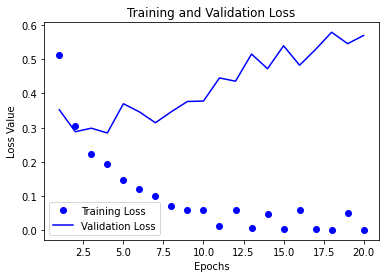

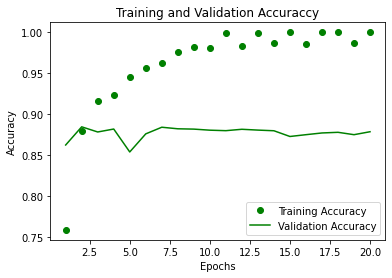

Epoch 1/3
49/49 [==============================] - 2s 35ms/step - loss: 0.4484 - accuracy: 0.7861
Epoch 2/3
49/49 [==============================] - 2s 35ms/step - loss: 0.2677 - accuracy: 0.8930
Epoch 3/3
782/782 [==============================] - 2s 3ms/step - loss: 0.4083 - accuracy: 0.8344


[0.4083291292190552, 0.8343600034713745]

In [21]:
from keras import models
from tensorflow.keras import layers

model = models.Sequential()
model.add(layers.Dense(128, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

from keras import optimizers
from keras import losses
from keras import metrics

from tensorflow import keras
from keras import optimizers
from tensorflow.keras import optimizers
from tensorflow.keras import optimizers

model.compile(optimizer=optimizers.RMSprop(learning_rate=0.001),
              loss = losses.binary_crossentropy,
              metrics = [metrics.binary_accuracy])

x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

history_dict = history.history
history_dict.keys()

# Plotting the training and validation loss

import matplotlib.pyplot as plt

Loss_Values = history_dict['loss']
Val_Loss_Values = history_dict['val_loss']

epochs = range(1, len(Loss_Values) + 1)

plt.plot(epochs, Loss_Values, 'bo', label="Training Loss")
plt.plot(epochs, Val_Loss_Values, 'b', label="Validation Loss")

plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss Value')
plt.legend()

plt.show()


# Plotting the training and validation accuracy
# Training and Validation Accuracy

Acc_Values = history_dict['binary_accuracy']
Val_Acc_Values = history_dict['val_binary_accuracy']

epochs = range(1, len(Loss_Values) + 1)

plt.plot(epochs, Acc_Values, 'go', label="Training Accuracy")
plt.plot(epochs, Val_Acc_Values, 'g', label="Validation Accuracy")

plt.title('Training and Validation Accuraccy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


model = models.Sequential()
model.add(layers.Dense(128, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=3, batch_size=512)
results = model.evaluate(x_test, y_test)

results

I will now test 8 hidden neurons with 2 hidden layers to see how it affects the model

Epoch 1/20
30/30 [==============================] - 2s 42ms/step - loss: 0.5591 - binary_accuracy: 0.7743 - val_loss: 0.4539 - val_binary_accuracy: 0.8496
Epoch 2/20
30/30 [==============================] - 1s 21ms/step - loss: 0.3805 - binary_accuracy: 0.8883 - val_loss: 0.3609 - val_binary_accuracy: 0.8741
Epoch 3/20
30/30 [==============================] - 1s 18ms/step - loss: 0.2943 - binary_accuracy: 0.9084 - val_loss: 0.3205 - val_binary_accuracy: 0.8775
Epoch 4/20
30/30 [==============================] - 1s 18ms/step - loss: 0.2404 - binary_accuracy: 0.9243 - val_loss: 0.2890 - val_binary_accuracy: 0.8890
Epoch 5/20
30/30 [==============================] - 1s 25ms/step - loss: 0.2041 - binary_accuracy: 0.9356 - val_loss: 0.2840 - val_binary_accuracy: 0.8868
Epoch 6/20
30/30 [==============================] - 1s 26ms/step - loss: 0.1782 - binary_accuracy: 0.9439 - val_loss: 0.2746 - val_binary_accuracy: 0.8897
Epoch 7/20
30/30 [==============================] - 1s 31ms/step - los

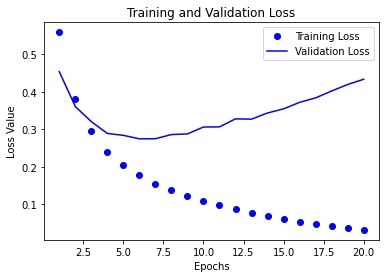

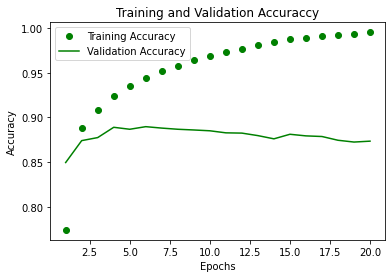

Epoch 1/3
49/49 [==============================] - 1s 13ms/step - loss: 0.5719 - accuracy: 0.7549
Epoch 2/3
49/49 [==============================] - 1s 17ms/step - loss: 0.3825 - accuracy: 0.8854
Epoch 3/3
782/782 [==============================] - 1s 2ms/step - loss: 0.3065 - accuracy: 0.8854


[0.30653685331344604, 0.8853999972343445]

In [22]:
from keras import models
from tensorflow.keras import layers

model = models.Sequential()
model.add(layers.Dense(8, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(8, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

from keras import optimizers
from keras import losses
from keras import metrics

from tensorflow import keras
from keras import optimizers
from tensorflow.keras import optimizers
from tensorflow.keras import optimizers

model.compile(optimizer=optimizers.RMSprop(learning_rate=0.001),
              loss = losses.binary_crossentropy,
              metrics = [metrics.binary_accuracy])

x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

history_dict = history.history
history_dict.keys()

# Plotting the training and validation loss

import matplotlib.pyplot as plt

Loss_Values = history_dict['loss']
Val_Loss_Values = history_dict['val_loss']

epochs = range(1, len(Loss_Values) + 1)

plt.plot(epochs, Loss_Values, 'bo', label="Training Loss")
plt.plot(epochs, Val_Loss_Values, 'b', label="Validation Loss")

plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss Value')
plt.legend()

plt.show()


# Plotting the training and validation accuracy
# Training and Validation Accuracy

Acc_Values = history_dict['binary_accuracy']
Val_Acc_Values = history_dict['val_binary_accuracy']

epochs = range(1, len(Loss_Values) + 1)

plt.plot(epochs, Acc_Values, 'go', label="Training Accuracy")
plt.plot(epochs, Val_Acc_Values, 'g', label="Validation Accuracy")

plt.title('Training and Validation Accuraccy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


model = models.Sequential()
model.add(layers.Dense(8, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(8, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=3, batch_size=512)
results = model.evaluate(x_test, y_test)

results

Part 3 of the assignment - testing the mse loss function instead of the binary crossentropy

Epoch 1/20
30/30 [==============================] - 2s 44ms/step - loss: 0.1820 - binary_accuracy: 0.7565 - val_loss: 0.1518 - val_binary_accuracy: 0.8041
Epoch 2/20
30/30 [==============================] - 1s 23ms/step - loss: 0.1062 - binary_accuracy: 0.8869 - val_loss: 0.1017 - val_binary_accuracy: 0.8811
Epoch 3/20
30/30 [==============================] - 1s 27ms/step - loss: 0.0788 - binary_accuracy: 0.9143 - val_loss: 0.1104 - val_binary_accuracy: 0.8508
Epoch 4/20
30/30 [==============================] - 1s 21ms/step - loss: 0.0646 - binary_accuracy: 0.9287 - val_loss: 0.0904 - val_binary_accuracy: 0.8813
Epoch 5/20
30/30 [==============================] - 1s 19ms/step - loss: 0.0553 - binary_accuracy: 0.9382 - val_loss: 0.0867 - val_binary_accuracy: 0.8833
Epoch 6/20
30/30 [==============================] - 1s 20ms/step - loss: 0.0459 - binary_accuracy: 0.9535 - val_loss: 0.0872 - val_binary_accuracy: 0.8824
Epoch 7/20
30/30 [==============================] - 1s 19ms/step - los

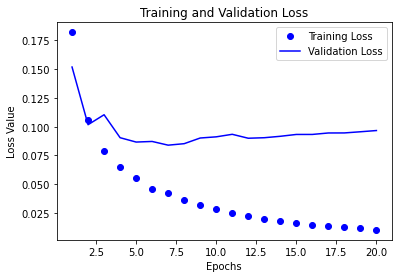

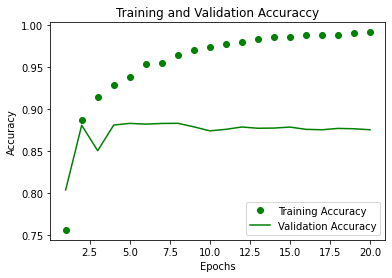

Epoch 1/3
49/49 [==============================] - 1s 16ms/step - loss: 0.1655 - accuracy: 0.8010
Epoch 2/3
49/49 [==============================] - 1s 15ms/step - loss: 0.0912 - accuracy: 0.8949
Epoch 3/3
782/782 [==============================] - 1s 2ms/step - loss: 0.0863 - accuracy: 0.8880


[0.08632288128137589, 0.8880000114440918]

In [23]:
from keras import models
from tensorflow.keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='MSE',
              metrics=['accuracy'])

from keras import optimizers
from keras import losses
from keras import metrics

from tensorflow import keras
from keras import optimizers
from tensorflow.keras import optimizers
from tensorflow.keras import optimizers

model.compile(optimizer=optimizers.RMSprop(learning_rate=0.001),
              loss = losses.MSE,
              metrics = [metrics.binary_accuracy])

x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

history_dict = history.history
history_dict.keys()

# Plotting the training and validation loss

import matplotlib.pyplot as plt

Loss_Values = history_dict['loss']
Val_Loss_Values = history_dict['val_loss']

epochs = range(1, len(Loss_Values) + 1)

plt.plot(epochs, Loss_Values, 'bo', label="Training Loss")
plt.plot(epochs, Val_Loss_Values, 'b', label="Validation Loss")

plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss Value')
plt.legend()

plt.show()


# Plotting the training and validation accuracy
# Training and Validation Accuracy

Acc_Values = history_dict['binary_accuracy']
Val_Acc_Values = history_dict['val_binary_accuracy']

epochs = range(1, len(Loss_Values) + 1)

plt.plot(epochs, Acc_Values, 'go', label="Training Accuracy")
plt.plot(epochs, Val_Acc_Values, 'g', label="Validation Accuracy")

plt.title('Training and Validation Accuraccy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='MSE',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=3, batch_size=512)
results = model.evaluate(x_test, y_test)

results

Testing the MSE with 32 neurons instead of 16

Epoch 1/20
30/30 [==============================] - 3s 48ms/step - loss: 0.1766 - binary_accuracy: 0.7621 - val_loss: 0.1325 - val_binary_accuracy: 0.8335
Epoch 2/20
30/30 [==============================] - 1s 23ms/step - loss: 0.0990 - binary_accuracy: 0.8848 - val_loss: 0.1063 - val_binary_accuracy: 0.8628
Epoch 3/20
30/30 [==============================] - 1s 24ms/step - loss: 0.0756 - binary_accuracy: 0.9103 - val_loss: 0.0861 - val_binary_accuracy: 0.8898
Epoch 4/20
30/30 [==============================] - 1s 24ms/step - loss: 0.0620 - binary_accuracy: 0.9256 - val_loss: 0.0839 - val_binary_accuracy: 0.8880
Epoch 5/20
30/30 [==============================] - 1s 23ms/step - loss: 0.0536 - binary_accuracy: 0.9379 - val_loss: 0.0906 - val_binary_accuracy: 0.8772
Epoch 6/20
30/30 [==============================] - 1s 23ms/step - loss: 0.0465 - binary_accuracy: 0.9467 - val_loss: 0.0852 - val_binary_accuracy: 0.8845
Epoch 7/20
30/30 [==============================] - 1s 23ms/step - los

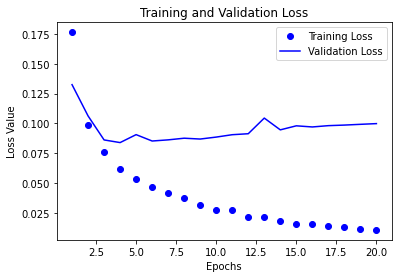

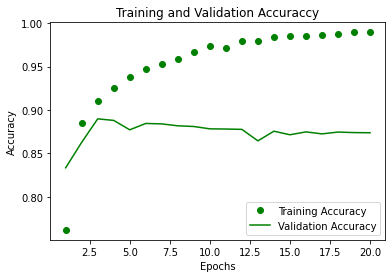

Epoch 1/3
49/49 [==============================] - 1s 17ms/step - loss: 0.1621 - accuracy: 0.7814
Epoch 2/3
49/49 [==============================] - 1s 18ms/step - loss: 0.0876 - accuracy: 0.8921
Epoch 3/3
782/782 [==============================] - 2s 2ms/step - loss: 0.0880 - accuracy: 0.8828


[0.0880466029047966, 0.8828399777412415]

In [24]:
from keras import models
from tensorflow.keras import layers

model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='MSE',
              metrics=['accuracy'])

from keras import optimizers
from keras import losses
from keras import metrics

from tensorflow import keras
from keras import optimizers
from tensorflow.keras import optimizers
from tensorflow.keras import optimizers

model.compile(optimizer=optimizers.RMSprop(learning_rate=0.001),
              loss = losses.MSE,
              metrics = [metrics.binary_accuracy])

x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

history_dict = history.history
history_dict.keys()

# Plotting the training and validation loss

import matplotlib.pyplot as plt

Loss_Values = history_dict['loss']
Val_Loss_Values = history_dict['val_loss']

epochs = range(1, len(Loss_Values) + 1)

plt.plot(epochs, Loss_Values, 'bo', label="Training Loss")
plt.plot(epochs, Val_Loss_Values, 'b', label="Validation Loss")

plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss Value')
plt.legend()

plt.show()


# Plotting the training and validation accuracy
# Training and Validation Accuracy

Acc_Values = history_dict['binary_accuracy']
Val_Acc_Values = history_dict['val_binary_accuracy']

epochs = range(1, len(Loss_Values) + 1)

plt.plot(epochs, Acc_Values, 'go', label="Training Accuracy")
plt.plot(epochs, Val_Acc_Values, 'g', label="Validation Accuracy")

plt.title('Training and Validation Accuraccy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='MSE',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=3, batch_size=512)
results = model.evaluate(x_test, y_test)

results

Now trying with 64 neurons, 2 hidden layers, with MSE activation function

Epoch 1/20
30/30 [==============================] - 2s 63ms/step - loss: 0.1777 - binary_accuracy: 0.7477 - val_loss: 0.1161 - val_binary_accuracy: 0.8649
Epoch 2/20
30/30 [==============================] - 1s 42ms/step - loss: 0.0981 - binary_accuracy: 0.8813 - val_loss: 0.0949 - val_binary_accuracy: 0.8782
Epoch 3/20
30/30 [==============================] - 1s 34ms/step - loss: 0.0755 - binary_accuracy: 0.9060 - val_loss: 0.0851 - val_binary_accuracy: 0.8875
Epoch 4/20
30/30 [==============================] - 2s 52ms/step - loss: 0.0631 - binary_accuracy: 0.9225 - val_loss: 0.0825 - val_binary_accuracy: 0.8869
Epoch 5/20
30/30 [==============================] - 1s 47ms/step - loss: 0.0555 - binary_accuracy: 0.9289 - val_loss: 0.0832 - val_binary_accuracy: 0.8852
Epoch 6/20
30/30 [==============================] - 2s 71ms/step - loss: 0.0486 - binary_accuracy: 0.9408 - val_loss: 0.0830 - val_binary_accuracy: 0.8845
Epoch 7/20
30/30 [==============================] - 2s 58ms/step - los

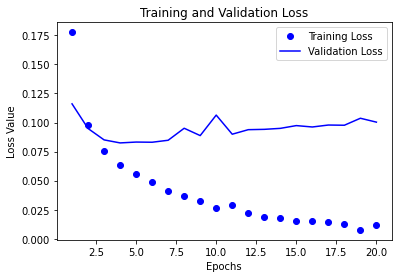

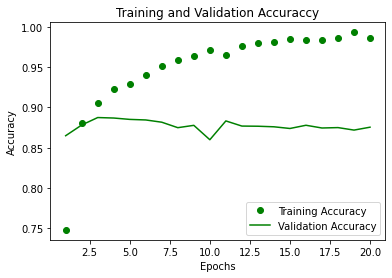

Epoch 1/3
49/49 [==============================] - 2s 25ms/step - loss: 0.1507 - accuracy: 0.7923
Epoch 2/3
49/49 [==============================] - 1s 25ms/step - loss: 0.0860 - accuracy: 0.8899
Epoch 3/3
782/782 [==============================] - 2s 3ms/step - loss: 0.0831 - accuracy: 0.8876


[0.08312423527240753, 0.8876399993896484]

In [25]:
from keras import models
from tensorflow.keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='MSE',
              metrics=['accuracy'])

from keras import optimizers
from keras import losses
from keras import metrics

from tensorflow import keras
from keras import optimizers
from tensorflow.keras import optimizers
from tensorflow.keras import optimizers

model.compile(optimizer=optimizers.RMSprop(learning_rate=0.001),
              loss = losses.MSE,
              metrics = [metrics.binary_accuracy])

x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

history_dict = history.history
history_dict.keys()

# Plotting the training and validation loss

import matplotlib.pyplot as plt

Loss_Values = history_dict['loss']
Val_Loss_Values = history_dict['val_loss']

epochs = range(1, len(Loss_Values) + 1)

plt.plot(epochs, Loss_Values, 'bo', label="Training Loss")
plt.plot(epochs, Val_Loss_Values, 'b', label="Validation Loss")

plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss Value')
plt.legend()

plt.show()


# Plotting the training and validation accuracy
# Training and Validation Accuracy

Acc_Values = history_dict['binary_accuracy']
Val_Acc_Values = history_dict['val_binary_accuracy']

epochs = range(1, len(Loss_Values) + 1)

plt.plot(epochs, Acc_Values, 'go', label="Training Accuracy")
plt.plot(epochs, Val_Acc_Values, 'g', label="Validation Accuracy")

plt.title('Training and Validation Accuraccy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='MSE',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=3, batch_size=512)
results = model.evaluate(x_test, y_test)

results

Part 4 of the assignment - using the tanh activation instead of relu 

Epoch 1/20
30/30 [==============================] - 2s 39ms/step - loss: 0.4741 - binary_accuracy: 0.7907 - val_loss: 0.3465 - val_binary_accuracy: 0.8731
Epoch 2/20
30/30 [==============================] - 1s 19ms/step - loss: 0.2750 - binary_accuracy: 0.9003 - val_loss: 0.2854 - val_binary_accuracy: 0.8850
Epoch 3/20
30/30 [==============================] - 1s 19ms/step - loss: 0.2027 - binary_accuracy: 0.9275 - val_loss: 0.2829 - val_binary_accuracy: 0.8843
Epoch 4/20
30/30 [==============================] - 1s 20ms/step - loss: 0.1604 - binary_accuracy: 0.9417 - val_loss: 0.2887 - val_binary_accuracy: 0.8827
Epoch 5/20
30/30 [==============================] - 1s 20ms/step - loss: 0.1314 - binary_accuracy: 0.9535 - val_loss: 0.3027 - val_binary_accuracy: 0.8813
Epoch 6/20
30/30 [==============================] - 1s 20ms/step - loss: 0.1018 - binary_accuracy: 0.9651 - val_loss: 0.3429 - val_binary_accuracy: 0.8725
Epoch 7/20
30/30 [==============================] - 1s 20ms/step - los

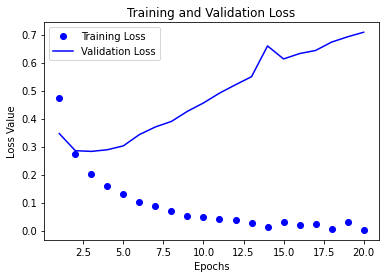

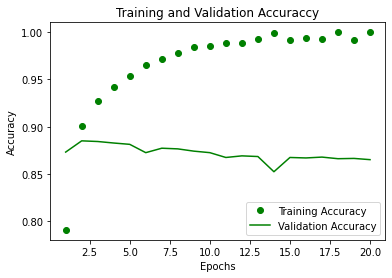

Epoch 1/3
49/49 [==============================] - 1s 15ms/step - loss: 0.4317 - accuracy: 0.8179
Epoch 2/3
49/49 [==============================] - 1s 14ms/step - loss: 0.2474 - accuracy: 0.9076
Epoch 3/3
782/782 [==============================] - 2s 2ms/step - loss: 0.2860 - accuracy: 0.8850


[0.28598710894584656, 0.8849999904632568]

In [26]:
from keras import models
from tensorflow.keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='tanh', input_shape=(10000,)))
model.add(layers.Dense(16, activation='tanh'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

from keras import optimizers
from keras import losses
from keras import metrics

from tensorflow import keras
from keras import optimizers
from tensorflow.keras import optimizers
from tensorflow.keras import optimizers

model.compile(optimizer=optimizers.RMSprop(learning_rate=0.001),
              loss = losses.binary_crossentropy,
              metrics = [metrics.binary_accuracy])

x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

history_dict = history.history
history_dict.keys()

# Plotting the training and validation loss

import matplotlib.pyplot as plt

Loss_Values = history_dict['loss']
Val_Loss_Values = history_dict['val_loss']

epochs = range(1, len(Loss_Values) + 1)

plt.plot(epochs, Loss_Values, 'bo', label="Training Loss")
plt.plot(epochs, Val_Loss_Values, 'b', label="Validation Loss")

plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss Value')
plt.legend()

plt.show()


# Plotting the training and validation accuracy
# Training and Validation Accuracy

Acc_Values = history_dict['binary_accuracy']
Val_Acc_Values = history_dict['val_binary_accuracy']

epochs = range(1, len(Loss_Values) + 1)

plt.plot(epochs, Acc_Values, 'go', label="Training Accuracy")
plt.plot(epochs, Val_Acc_Values, 'g', label="Validation Accuracy")

plt.title('Training and Validation Accuraccy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


model = models.Sequential()
model.add(layers.Dense(16, activation='tanh', input_shape=(10000,)))
model.add(layers.Dense(16, activation='tanh'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=3, batch_size=512)
results = model.evaluate(x_test, y_test)

results

Epoch 1/20
30/30 [==============================] - 2s 48ms/step - loss: 0.4867 - binary_accuracy: 0.7824 - val_loss: 0.3402 - val_binary_accuracy: 0.8735
Epoch 2/20
30/30 [==============================] - 1s 28ms/step - loss: 0.2744 - binary_accuracy: 0.8959 - val_loss: 0.2890 - val_binary_accuracy: 0.8795
Epoch 3/20
30/30 [==============================] - 1s 33ms/step - loss: 0.2000 - binary_accuracy: 0.9253 - val_loss: 0.2762 - val_binary_accuracy: 0.8889
Epoch 4/20
30/30 [==============================] - 1s 28ms/step - loss: 0.1566 - binary_accuracy: 0.9413 - val_loss: 0.3877 - val_binary_accuracy: 0.8534
Epoch 5/20
30/30 [==============================] - 1s 28ms/step - loss: 0.1316 - binary_accuracy: 0.9539 - val_loss: 0.3391 - val_binary_accuracy: 0.8737
Epoch 6/20
30/30 [==============================] - 1s 23ms/step - loss: 0.1134 - binary_accuracy: 0.9573 - val_loss: 0.3449 - val_binary_accuracy: 0.8817
Epoch 7/20
30/30 [==============================] - 1s 23ms/step - los

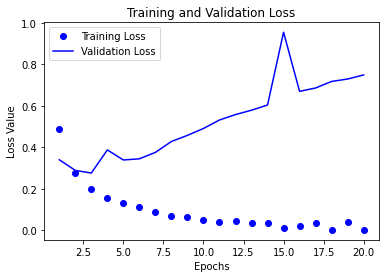

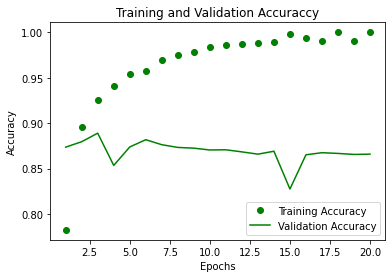

Epoch 1/3
49/49 [==============================] - 1s 17ms/step - loss: 0.4240 - accuracy: 0.8176
Epoch 2/3
49/49 [==============================] - 1s 17ms/step - loss: 0.2386 - accuracy: 0.9064
Epoch 3/3
782/782 [==============================] - 2s 2ms/step - loss: 0.3211 - accuracy: 0.8732


[0.3210514783859253, 0.873199999332428]

In [27]:
from keras import models
from tensorflow.keras import layers

model = models.Sequential()
model.add(layers.Dense(32, activation='tanh', input_shape=(10000,)))
model.add(layers.Dense(32, activation='tanh'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

from keras import optimizers
from keras import losses
from keras import metrics

from tensorflow import keras
from keras import optimizers
from tensorflow.keras import optimizers
from tensorflow.keras import optimizers

model.compile(optimizer=optimizers.RMSprop(learning_rate=0.001),
              loss = losses.binary_crossentropy,
              metrics = [metrics.binary_accuracy])

x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

history_dict = history.history
history_dict.keys()

# Plotting the training and validation loss

import matplotlib.pyplot as plt

Loss_Values = history_dict['loss']
Val_Loss_Values = history_dict['val_loss']

epochs = range(1, len(Loss_Values) + 1)

plt.plot(epochs, Loss_Values, 'bo', label="Training Loss")
plt.plot(epochs, Val_Loss_Values, 'b', label="Validation Loss")

plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss Value')
plt.legend()

plt.show()


# Plotting the training and validation accuracy
# Training and Validation Accuracy

Acc_Values = history_dict['binary_accuracy']
Val_Acc_Values = history_dict['val_binary_accuracy']

epochs = range(1, len(Loss_Values) + 1)

plt.plot(epochs, Acc_Values, 'go', label="Training Accuracy")
plt.plot(epochs, Val_Acc_Values, 'g', label="Validation Accuracy")

plt.title('Training and Validation Accuraccy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


model = models.Sequential()
model.add(layers.Dense(32, activation='tanh', input_shape=(10000,)))
model.add(layers.Dense(32, activation='tanh'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=3, batch_size=512)
results = model.evaluate(x_test, y_test)

results

Part 5 - I am going to test the dropout method on the model to see its effects

Epoch 1/20
30/30 [==============================] - 2s 40ms/step - loss: 0.6016 - binary_accuracy: 0.6661 - val_loss: 0.4957 - val_binary_accuracy: 0.8542
Epoch 2/20
30/30 [==============================] - 1s 20ms/step - loss: 0.3949 - binary_accuracy: 0.8824 - val_loss: 0.3578 - val_binary_accuracy: 0.8761
Epoch 3/20
30/30 [==============================] - 1s 19ms/step - loss: 0.2765 - binary_accuracy: 0.9149 - val_loss: 0.3056 - val_binary_accuracy: 0.8825
Epoch 4/20
30/30 [==============================] - 1s 20ms/step - loss: 0.2132 - binary_accuracy: 0.9308 - val_loss: 0.2811 - val_binary_accuracy: 0.8898
Epoch 5/20
30/30 [==============================] - 1s 20ms/step - loss: 0.1769 - binary_accuracy: 0.9451 - val_loss: 0.2827 - val_binary_accuracy: 0.8856
Epoch 6/20
30/30 [==============================] - 1s 19ms/step - loss: 0.1498 - binary_accuracy: 0.9519 - val_loss: 0.2930 - val_binary_accuracy: 0.8809
Epoch 7/20
30/30 [==============================] - 1s 19ms/step - los

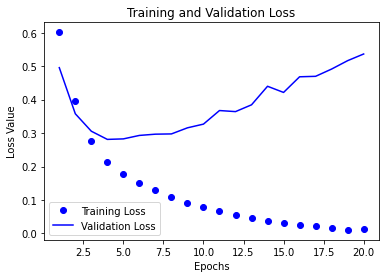

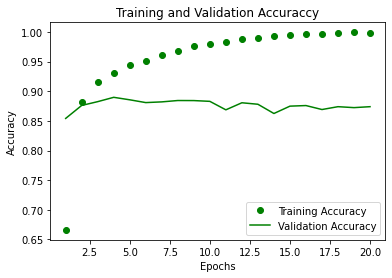

Epoch 1/3
49/49 [==============================] - 1s 14ms/step - loss: 0.4824 - accuracy: 0.8038
Epoch 2/3
49/49 [==============================] - 1s 15ms/step - loss: 0.2817 - accuracy: 0.9008
Epoch 3/3
782/782 [==============================] - 2s 2ms/step - loss: 0.2792 - accuracy: 0.8896


[0.27922460436820984, 0.8895999789237976]

In [29]:
from keras import models
from tensorflow.keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
layers.Dropout(0.5),
model.add(layers.Dense(16, activation='relu'))
layers.Dropout(0.5),
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

from keras import optimizers
from keras import losses
from keras import metrics

from tensorflow import keras
from keras import optimizers
from tensorflow.keras import optimizers
from tensorflow.keras import optimizers

model.compile(optimizer=optimizers.RMSprop(learning_rate=0.001),
              loss = losses.binary_crossentropy,
              metrics = [metrics.binary_accuracy])

x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

history_dict = history.history
history_dict.keys()

# Plotting the training and validation loss

import matplotlib.pyplot as plt

Loss_Values = history_dict['loss']
Val_Loss_Values = history_dict['val_loss']

epochs = range(1, len(Loss_Values) + 1)

plt.plot(epochs, Loss_Values, 'bo', label="Training Loss")
plt.plot(epochs, Val_Loss_Values, 'b', label="Validation Loss")

plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss Value')
plt.legend()

plt.show()


# Plotting the training and validation accuracy
# Training and Validation Accuracy

Acc_Values = history_dict['binary_accuracy']
Val_Acc_Values = history_dict['val_binary_accuracy']

epochs = range(1, len(Loss_Values) + 1)

plt.plot(epochs, Acc_Values, 'go', label="Training Accuracy")
plt.plot(epochs, Val_Acc_Values, 'g', label="Validation Accuracy")

plt.title('Training and Validation Accuraccy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
layers.Dropout(0.5),
model.add(layers.Dense(16, activation='relu'))
layers.Dropout(0.5),
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=3, batch_size=512)
results = model.evaluate(x_test, y_test)

results